In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Yeast\Yeast_AE_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22
...,...,...,...,...,...,...,...,...
1479,0.82,0.63,0.47,0.18,0.5,0.0,0.50,0.22
1480,0.35,0.29,0.46,0.14,0.5,0.0,0.54,0.66
1481,0.41,0.47,0.50,0.14,0.5,0.0,0.53,0.37
1482,0.51,0.45,0.62,0.25,0.5,0.0,0.59,0.22


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	42
float64		column 2	14
float64		column 3	28
float64		column 4	7
float64		column 5	0
float64		column 6	0
float64		column 7	14
float64		column 8	7


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,1442.000000,1470.000000,1456.000000,1477.000000,1484.000000,1484.000000,1470.000000,1477.000000
mean,0.500305,0.499605,0.499760,0.261605,0.504717,0.007500,0.499939,0.276412
std,0.137664,0.123532,0.086689,0.137244,0.048351,0.075683,0.057894,0.106681
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.457500,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.485000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.580000,0.570000,0.550000,0.320000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,1.000000


<AxesSubplot:>

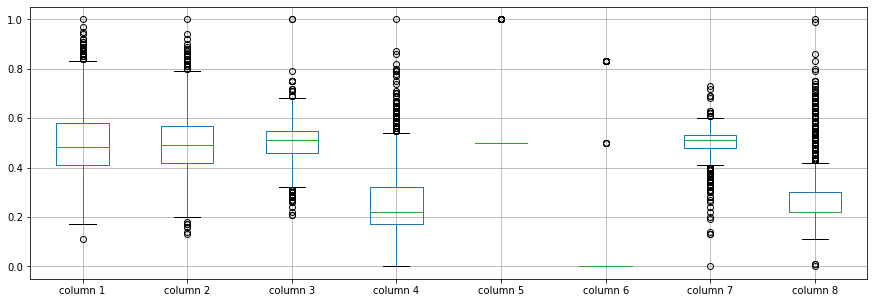

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    0.500305
column 2    0.499605
column 3    0.499760
column 4    0.261605
column 5    0.504717
column 6    0.007500
column 7    0.499939
column 8    0.276412
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.578462,-0.164666,0.155841,0.066964,0.017363,0.071908,-0.125181
column 2,0.578462,1.000000,-0.271577,0.140075,0.061569,-0.000592,0.088128,-0.107775
column 3,-0.164666,-0.271577,1.000000,0.059075,-0.007848,0.003110,-0.190999,-0.019575
column 4,0.155841,0.140075,0.059075,1.000000,0.002596,-0.009355,-0.103867,-0.057652
column 5,0.066964,0.061569,-0.007848,0.002596,1.000000,-0.009674,0.043672,0.002636
column 6,0.017363,-0.000592,0.003110,-0.009355,-0.009674,1.000000,0.019074,-0.035878
column 7,0.071908,0.088128,-0.190999,-0.103867,0.043672,0.019074,1.000000,0.087640
column 8,-0.125181,-0.107775,-0.019575,-0.057652,0.002636,-0.035878,0.087640,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+13,8+13+13,8+13+13+13,8+13+13+13+13,8+13+13+13+13+13,8+13+13+13+13+13+13,8+13+13+13+13+13,8+13+13+13+13,8+13+13+13,8+13+13,8+13,8], vae_layer = False, seed = 8)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 3.03550734727279
Epoch: 1 , loss: 2.7347363596377163
Epoch: 2 , loss: 2.38216597619264
Epoch: 3 , loss: 2.2244612600492393
Epoch: 4 , loss: 2.0726567467917567
Epoch: 5 , loss: 1.9879784635875537
Epoch: 6 , loss: 1.898566686588785
Epoch: 7 , loss: 1.8121465224286784
Epoch: 8 , loss: 1.7280421127443728
Epoch: 9 , loss: 1.6724824425966844
Epoch: 10 , loss: 1.6072700593782507
Epoch: 11 , loss: 1.5628628419793171
Epoch: 12 , loss: 1.529615757258042
Epoch: 13 , loss: 1.4602405726909637
Epoch: 14 , loss: 1.442265229380649
Epoch: 15 , loss: 1.4182004889716273
Epoch: 16 , loss: 1.3661740350982416
Epoch: 17 , loss: 1.365151383306669
Epoch: 18 , loss: 1.319903291437937
Epoch: 19 , loss: 1.2926219785990922
Epoch: 20 , loss: 1.3009680775196657
Epoch: 21 , loss: 1.2804219981898433
Epoch: 22 , loss: 1.2942146866217903
Epoch: 23 , loss: 1.2555636193441309
Epoch: 24 , loss: 1.245709993917009
Epoch: 25 , loss: 1.24215044

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(1484, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    0.43
column 2    0.44
column 3    0.48
column 4    0.22
column 5    0.50
column 6    0.00
column 7    0.51
column 8    0.22
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Yeast.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(2.0043720408734007, 46.90414374018569)

In [17]:
NRMS=numerator/denominator
NRMS


0.042733368121506306

In [18]:
new_df.iloc[66,:]

column 1    0.46
column 2    0.49
column 3    0.58
column 4    0.23
column 5    0.50
column 6    0.00
column 7    0.44
column 8    0.22
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22
...,...,...,...,...,...,...,...,...
1479,0.82,0.63,0.47,0.18,0.5,0.0,0.50,0.22
1480,0.35,0.29,0.46,0.14,0.5,0.0,0.54,0.66
1481,0.41,0.47,0.50,0.14,0.5,0.0,0.53,0.37
1482,0.51,0.45,0.62,0.25,0.5,0.0,0.59,0.22


In [20]:
imputations[-1].to_excel("Yeast_AE_1(imp).xlsx", index=False, header=False)